In [1]:
# This code is to split the dataset in to test and train data, and then
# run a random forest algorithm to predice the price of food. 


# Initial tests show that increasing number of trees reaches a min MSE 
# at around 40 trees. 

# Initial testing also showed the split between test and train at 20% 
# test data has given a lower MSE (mean squared error)

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [126]:
nutrition = pd.read_pickle("./WHOLEnutrition_data_clean.pkl")
nutrition.drop(nutrition.columns[[0, 24, 30, 31, 32, 33, 34, 35, 36, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]], axis=1, inplace=True) 
nutrition.drop(nutrition.columns[36:], axis=1, inplace=True) 


# removing the brand, and food type columns for data cleaning. 
nutrition

,name,Food Group,Branded?,Price (£),Weight (GRAMS),Price per 100 grams (£/100g),Carbon Group,Land use (m2/kg),GHG(kgco2eq/kg),Water use(L/kg),...,Vitamin B-12 (mcg),Vitamin D (mcg),Trans Fatty Acids (g),Soluble Fiber (g),Insoluble Fiber (g),Sucrose (g),Glucose (Dextrose) (g),Fructose (g),"Selenium, Se (mcg)","Fluoride, F (mcg)"
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,NaN,1.70,260.0,0.653846,Bread products,3.482,1.441,567.0,...,NaN,NaN,4.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,X,1.50,567.0,0.264550,Bread products,3.482,1.441,567.0,...,2.86,NaN,NaN,NaN,NaN,2.67,0.00,0.0,9.5,NaN
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,X,1.50,567.0,0.264550,Bread products,3.482,1.441,567.0,...,1.62,0.0,NaN,NaN,NaN,2.85,0.05,0.0,10.3,NaN
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,X,1.50,567.0,0.264550,Bread products,3.482,1.441,567.0,...,2.44,NaN,NaN,NaN,NaN,2.77,0.00,0.0,10.1,NaN
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,X,1.50,567.0,0.264550,Bread products,3.482,1.441,567.0,...,2.18,NaN,NaN,NaN,NaN,3.31,0.00,0.0,12.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,NaN,0.90,85.0,1.058824,Other vegetables,0.310,0.455,83.0,...,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN
1219,Romaine Lettuce Raw,Vegetables,NaN,1.00,400.0,0.250000,Other vegetables,0.310,0.455,83.0,...,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN
1220,Palak Paneer,Vegetables,NaN,3.75,500.0,0.750000,Cheese,80.642,21.240,4735.0,...,0.08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN
1221,Carrots Raw Salad,Vegetables,NaN,0.41,1000.0,0.041000,Other vegetables,0.310,0.455,83.0,...,0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN


In [4]:
nutrition = nutrition.dropna() # dropping NaN values. This ensures random forests can accept data. 
nutrition

,name,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq/100g),Eutr emissions (kg PO43-eq per 100g),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,1.70,260.0,0.653846,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,0.008875,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


In [5]:
nutrition.dtypes # checking types of data

name                                      object
Price (£)                                float64
Weight (GRAMS)                           float64
Price per Weight (£/100Gram)             float64
Carbon Group                              object
Land use (m2/100g)                       float64
GHG(kgco2eq/100g)                        float64
Water use (L/100g)                       float64
Acidifying emissions(kgSO2eq/100g)       float64
Eutr emissions  (kg PO43-eq per 100g)    float64
Calories                                   int64
Fat (g)                                  float64
Protein (g)                              float64
Carbohydrate (g)                         float64
Sugars (g)                               float64
Fiber (g)                                float64
Cholesterol (mg)                         float64
Saturated Fats (g)                       float64
dtype: object

In [6]:
X = nutrition.iloc[:, 10:].astype('float64').dropna() 
# pulling out the features data
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,330.0,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,273.0,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,309.0,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,289.0,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,298.0,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...
1218,241.0,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,19.0,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,96.0,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,208.0,15.70,1.22,17.17,11.23,2.3,9.0,2.452


In [25]:
y = nutrition.iloc[:, 3:4].astype('float64').dropna()
# pulling out the price data
y

,Price per Weight (£/100Gram)
0,0.653846
1,0.264550
2,0.264550
3,0.264550
4,0.264550
...,...
1218,1.058824
1219,0.250000
1220,0.750000
1221,0.041000


In [26]:
# flattening the array for use in the random forest algorithm
y = np.ravel(y)
y

array([0.65384615, 0.26455026, 0.26455026, ..., 0.75      , 0.041     ,
       0.17142857])

In [27]:
from sklearn.model_selection import train_test_split
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X,y,test_size=0.2)
# splitting the data into train and test data. 
#size =0.2 means 80% data is training data, 20% testing

In [29]:
# splitting the training data into validation and training data. 
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation,y_train_validation,test_size=0.15)

In [31]:
#implementing the random forest here

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
# checking the outputs 
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1389311024015845
Mean Squared Error: 106.67102729897503
Root Mean Squared Error: 10.32816669593278


In [33]:
np.mean(y)
np.std(y)

6.671871584606187

In [50]:
Mean_Absolute_Error = []
Mean_Squared_Error = []
Root_Mean_Squared_Error = []

In [51]:
# creating a for loop to evaluate the hyperperameters of the model. Initally with n_estimators
#implementing the random forest here
for i in range (1, 200, 5):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    Mean_Absolute_Error.append(mae)
    Mean_Squared_Error.append(mse)
    Root_Mean_Squared_Error.append(rmse)
    
    

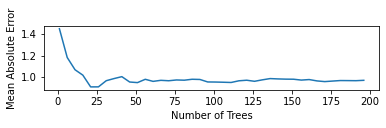

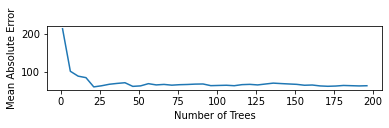

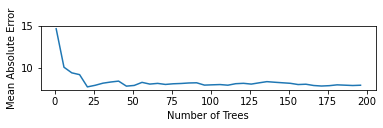

In [102]:
# plotting the different metrics to see the effect of changing the number of trees
import matplotlib.pyplot as plt
n_trees = list(range(1, 200, 5))

f = plt.figure(1)

plt.subplot(311)
plt.plot(n_trees, Mean_Absolute_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(312)
plt.plot(n_trees, Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(313)
plt.plot(n_trees, Root_Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()


<Figure size 432x288 with 0 Axes>